
# Transfer Functions


You can change a visualization's appearance by accessing and modifying its transfer function.

Vapor 3.10.0
Python 3.9.19 (/opt/anaconda3/envs/vapor)
OpenGL 4.1 Metal - 89.3


UNSUPPORTED (log once): POSSIBLE ISSUE: unit 3 GLD_TEXTURE_INDEX_3D is unloadable and bound to sampler type (Float) - using zero texture because texture unloadable


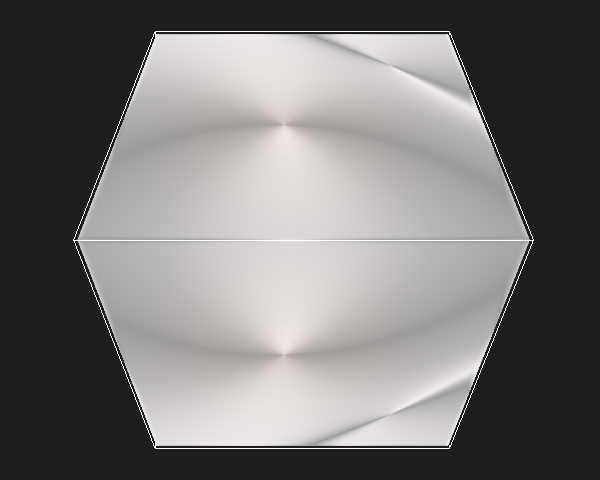

In [1]:
import example_utils
from vapor import session, renderer, dataset, camera, transferfunction
from vapor.utils import histogram

ses = session.Session()
data = example_utils.OpenExampleDataset(ses)

ren = data.NewRenderer(renderer.VolumeRenderer)
ses.GetCamera().LookAt((32, 120, 120), (32, 32, 32))
ses.Show()

## Changing Opacities

Vapor's transferFunctionWidget allows you to adjust the opacity points of a renderer as you would within Vapor's GUI.

In [2]:
from vapor.utils import histogram
histogram.transferFunctionWidget(ses, ren)

If you do not have access to the widget, we provide static options for changing the opacities as well.
We created a volume rendering however it is fully opaque.
We can use a transfer function to adjust the visible portions.
Before we adjust the opacity map of the TF, we get a histogram to help us determine what we want to hide.


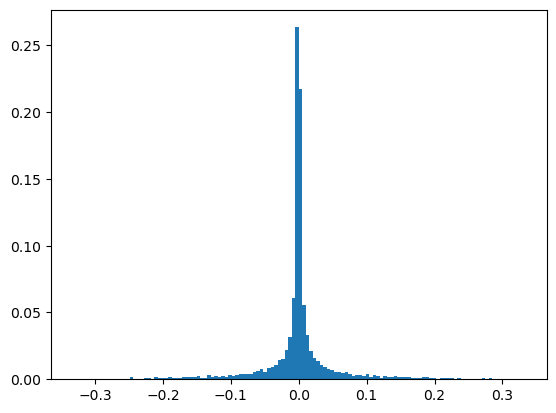

In [3]:
histogram.ShowMatPlotLibHistogram(ses, ren)


Usually we want to hide the most common value so below we construct an opacity map that accomplishes this.


In [4]:
# List of x,y pairs where x is the data value and y is the opacity for that data value
opacities = [(-0.3, 1), (-0.1, 0), (0.1, 0), (0.3, 1)]


We can get the matplotlib histogram plot and add our opacity map to it to compare.


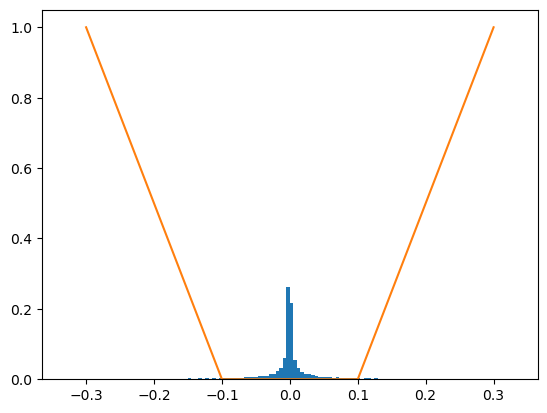

In [5]:
plt = histogram.GetMatPlotLibHistogram(ses, ren)
plt.plot(*zip(*opacities))
plt.show()


Now we apply the map to the transfer function


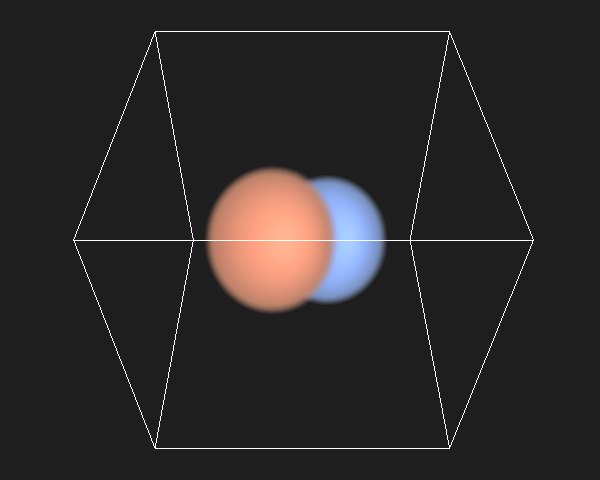

In [6]:
# Renderers can have multiple transfer functions.
# GetPrimaryTransferFunction returns the one that is usually the most useful.
# You can use `tf.GetTransferFunction(var_name)` to get other transfer functions.
tf = ren.GetPrimaryTransferFunction()
tf.SetOpacityControlPoints(opacities)
ses.Show()


You can adjust the colormap in a similar fashion. Use `help(tf)` for more information.
Vapor includes a list of built-in colormaps and these can be applied with `tf.LoadBuiltinColormap(name)`

## Builtin Colormaps


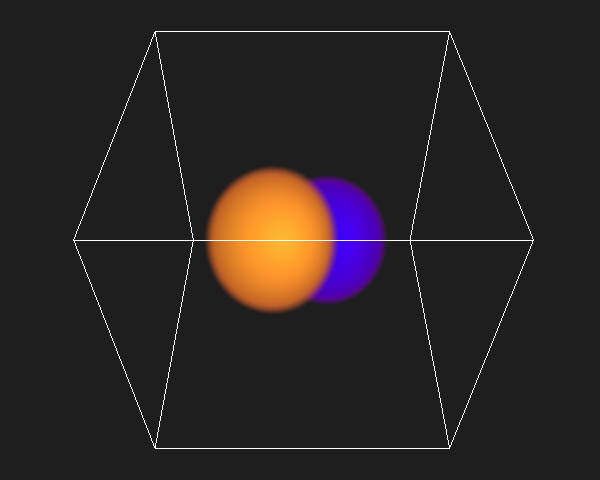

In [7]:
tf.LoadBuiltinColormap("Sequential/BlackBodyExtended")
ses.Show()


## List of All Builtin Colormaps


Highlighting/topo


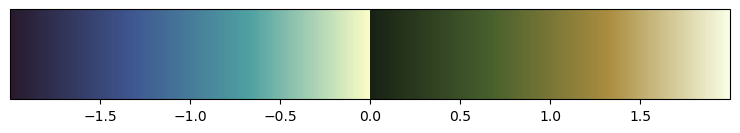

Highlighting/oxy


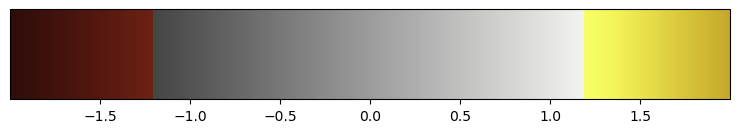

Diverging/tarn


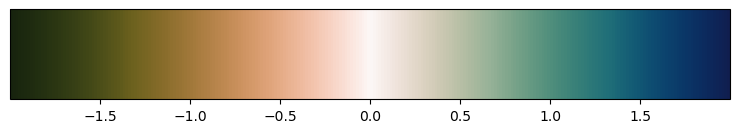

Diverging/curl


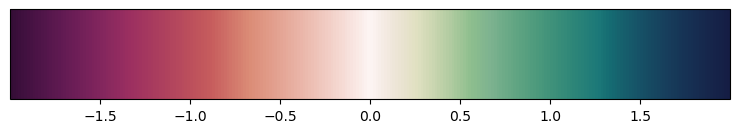

Diverging/CoolWarmSmooth


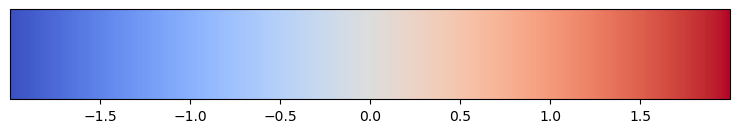

Diverging/PurpleWhiteOrange


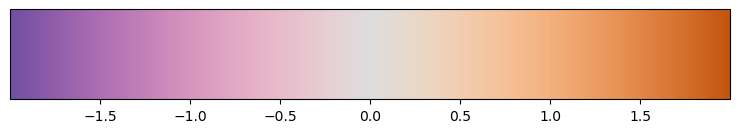

Diverging/diff


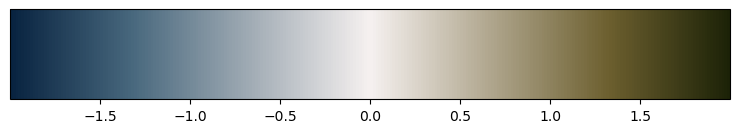

Diverging/GreenWhiteRed


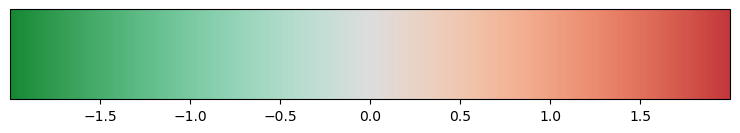

Diverging/CoolWarmBent


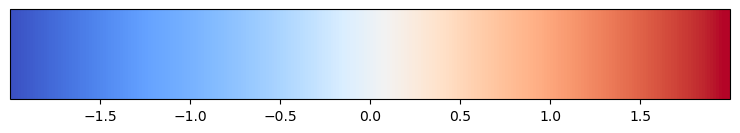

Diverging/BlueWhiteGold


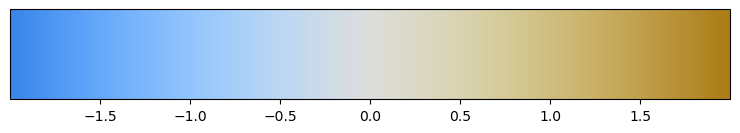

Diverging/CoolWarm


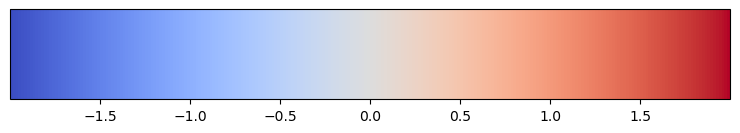

Diverging/GreenWhitePurple


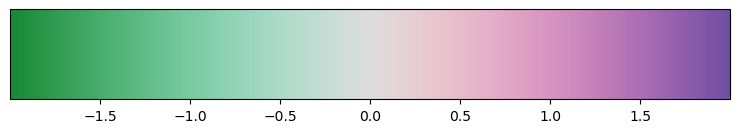

Diverging/balance


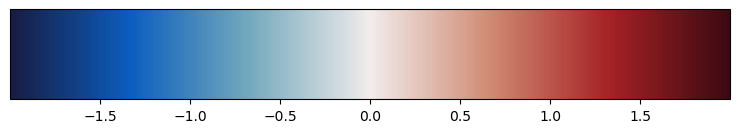

Diverging/delta


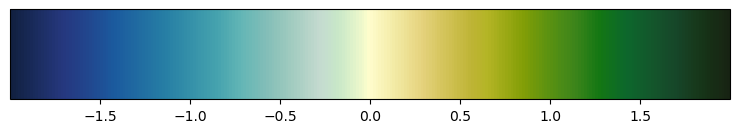

Sequential/BlackBody


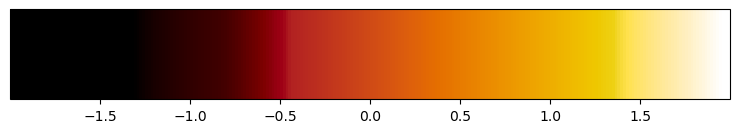

Sequential/thermal


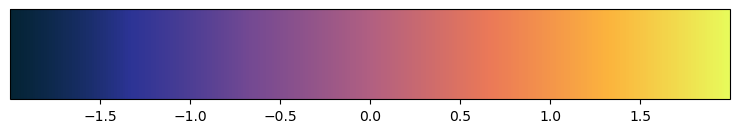

Sequential/tempo


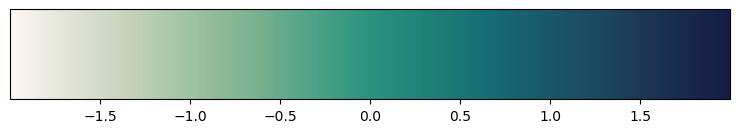

Sequential/speed


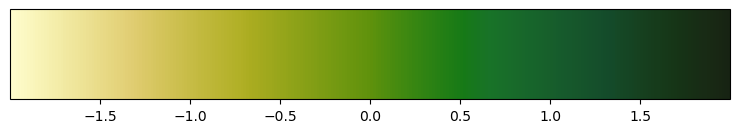

Sequential/Kindlmann


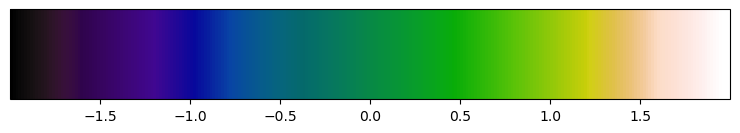

Sequential/KindlmannExtended


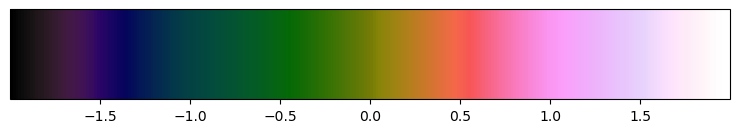

Sequential/algae


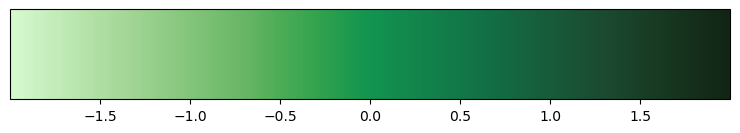

Sequential/deep


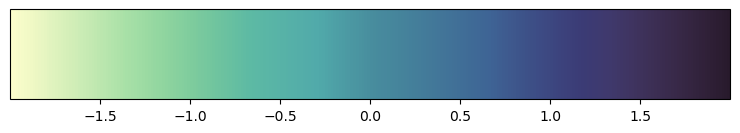

Sequential/haline


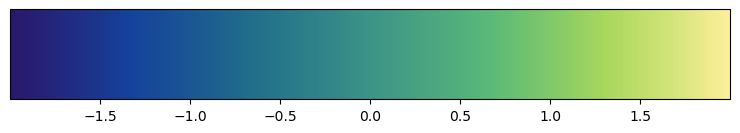

Sequential/turbid


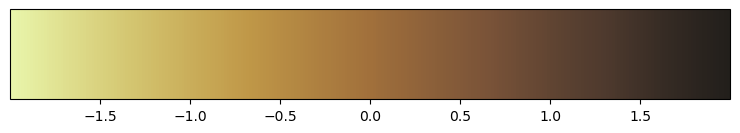

Sequential/rain


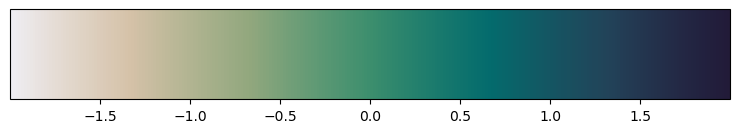

Sequential/Rainbow


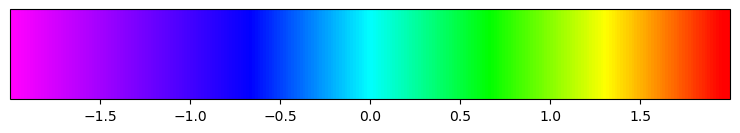

Sequential/phase


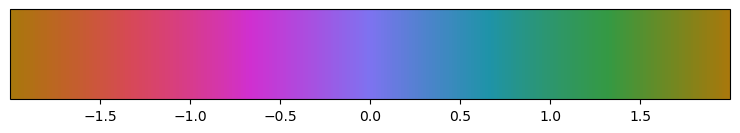

Sequential/BlackBodyExtended


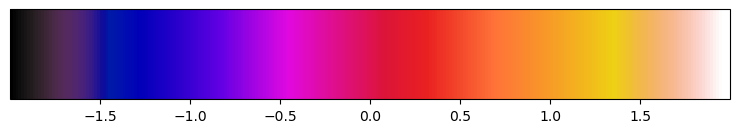

Sequential/dense


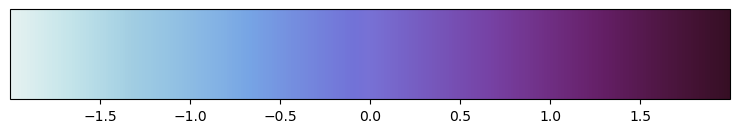

Sequential/amp


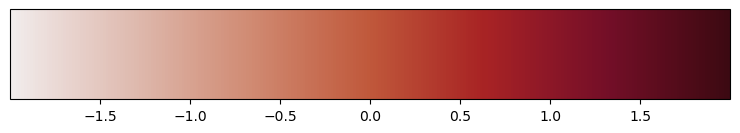

Sequential/ice


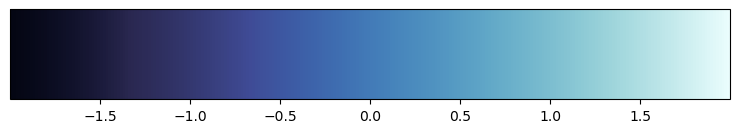

Sequential/matter


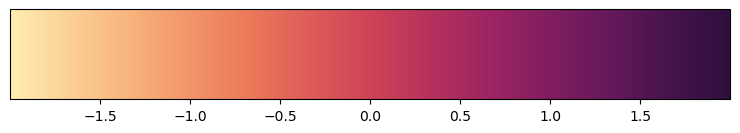

Sequential/BlackWhite


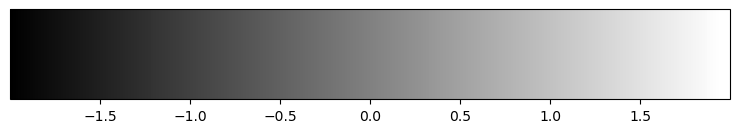

Sequential/solar


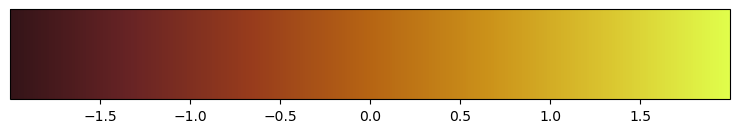

In [8]:

ses.DeleteRenderer(ren)
ren = data.NewRenderer(renderer.TwoDDataRenderer)
tf = ren.GetPrimaryTransferFunction()

for cmap in transferfunction.TransferFunction.ListBuiltinColormaps():
    tf.LoadBuiltinColormap(cmap)

    print(cmap)
    tf.ShowMatPlotLibColorbar()